Number Of Words After Tokenization: 157581 

Number Of Words After Removing StopWords: 71894 

Most Common 10 Words: 

allah :  2739 

shall :  1281 

lord :  967 

say :  861 

believ :  761 

said :  617 

day :  514 

know :  452 

us :  440 

2 :  400 



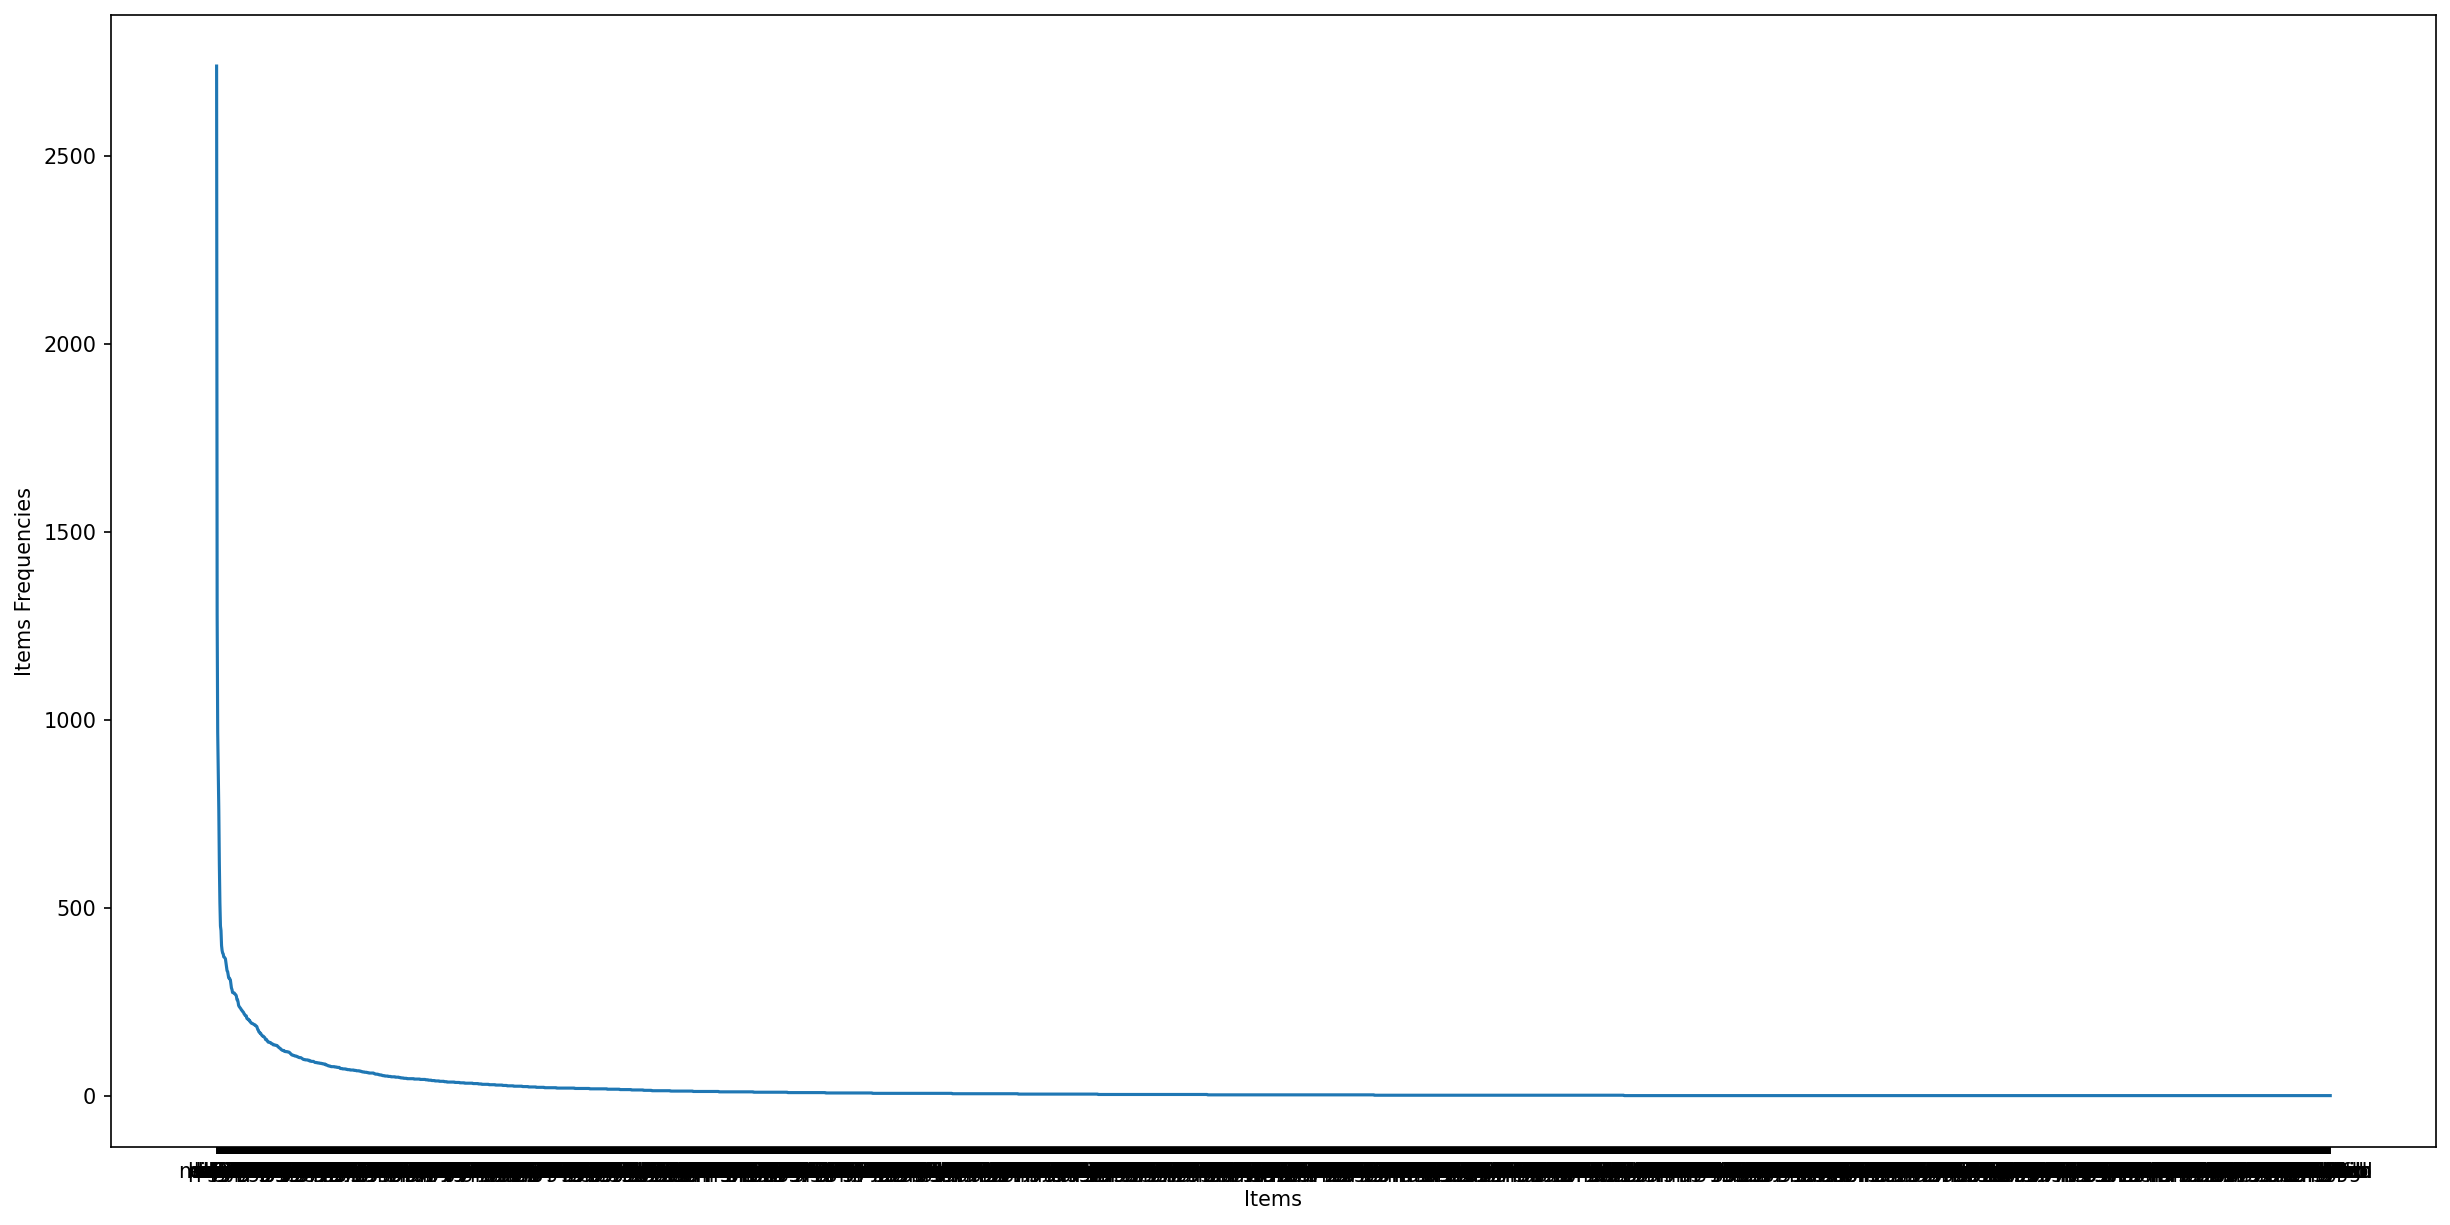

In [4]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt

#! Loading Files
fileResult = 'quran_after_preprocessing.txt'
fileName = 'quran.txt'
file = open(fileName, 'r')
text = file.read()
file.close()

#! Tokenization
tokenizer = RegexpTokenizer("[\w]+")
tokens = tokenizer.tokenize(text.lower())

print('Number Of Words After Tokenization:', len(tokens) ,'\n')

#! Remove Stop Words & Stemming
stopWords = set(stopwords.words("english"))
# items = [w for w in tokens if not w in stopWords]
items = []
for token in tokens:
    if token not in stopWords:
        items.append(PorterStemmer().stem(token))

print('Number Of Words After Removing StopWords:', len(items)  ,'\n')

#! Generating fileResult
with open(fileResult, 'w') as newFile:
    for item in items:
        newFile.write(item + '\n')

#! Items Frequencies
countered = OrderedDict(sorted(Counter(items).items(), key=lambda x: x[1], reverse=True))

#! Most Common 10 Words
mostCommonWord = {}
i = 0
for mcw in countered:
    if i < 10:
        mostCommonWord[mcw] = countered[mcw]
        i += 1

print('Most Common 10 Words: \n')
for item in mostCommonWord:
    print(item, ': ', mostCommonWord[item], '\n' )

#! Items Frequencies Plot
plt.figure(figsize=( 20, 10 ), dpi=150)
plt.plot(countered.keys(), countered.values())
plt.ylabel('Items Frequencies')
plt.xlabel('Items')
plt.show()
